# Dipole (bend) Example

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from pmd_beamphysics import single_particle
from pmd_beamphysics.units import mec2

import impact.z as IZ

In [2]:
reference_particle_mass = mec2
energy = 10e6
gamma = energy / mec2
sigma_x0 = 0.001
norm_emit_x = 1e-12
norm_emit_y = 1e-12
beta_x = sigma_x0**2 * gamma / norm_emit_x
beta_y = beta_x

n_particle = 1

In [3]:
initial_particles = single_particle(pz=energy)

In [4]:
input = IZ.ImpactZInput(
    # line 1
    ncpu_y=1,
    ncpu_z=1,
    # line 2
    seed=6,
    n_particle=n_particle,
    integrator_type="linear_map",
    err=1,
    diagnostic_type="extended",
    # line 3
    nx=32,
    ny=32,
    nz=32,
    boundary_type="trans_open_longi_open",
    radius_x=0.15,  # particles die after this point
    radius_y=0.15,
    z_period_size=0.0,  # TODO we think this is unused based on fortran code reading
    # line 4
    distribution="read",  # "gauss",
    restart=0,
    subcycle=0,  # TODO what is this?
    nbunch=1,
    # line 8
    twiss_alpha_x=0.0,
    twiss_beta_x=beta_x,
    twiss_norm_emit_x=norm_emit_x,
    twiss_mismatch_x=1.0,
    twiss_mismatch_px=1.0,
    twiss_offset_x=0.0,
    twiss_offset_px=0.0,
    # line 9
    twiss_alpha_y=0.0,
    twiss_beta_y=beta_y,
    twiss_norm_emit_y=norm_emit_y,
    twiss_mismatch_y=1.0,
    twiss_mismatch_py=1.0,
    twiss_offset_y=0.0,
    twiss_offset_py=0.0,
    # line 10
    twiss_alpha_z=0.0,
    twiss_beta_z=5e9,
    twiss_norm_emit_z=1e-9,
    twiss_mismatch_z=1.0,
    twiss_mismatch_e_z=1.0,
    twiss_offset_phase_z=0.0,
    twiss_offset_energy_z=0.0,
    # line 11
    # average_current=1.0,  # space charge on
    average_current=0.0,  # space charge off
    reference_kinetic_energy=energy - mec2,  # eV -> 10MeV total energy
    reference_particle_mass=reference_particle_mass,
    reference_particle_charge=-1.0,
    reference_frequency=1e9,  # arbitrarily set to 1GHz here
    initial_phase_ref=0.0,
    lattice=[
        IZ.WriteFull(file_id=1999, name="initial_particles"),
        # IZ.Drift(length=1e-9, steps=10, map_steps=10),  # <- to get initial particles, set this and set average_current to 0.0
        # IZ.Drift(length=1.0, radius=1.0, steps=10, map_steps=10, name="drift1"),
        IZ.Dipole(
            length=1.0,  # [m]
            steps=10,  # Number of space-charge kicks through the beamline element. Each "step" consists of a half-step, a space-charge kick, and another half-step.
            map_steps=10,  # Each half-step involves computing a map for that half-element which is computed by numerical integration.
            angle=1e-12,
            k1=0.0,
            input_switch=0.0,  # input switch 150., if >200, include 1D CSR
            hgap=0.0,
            e1=0.0,
            e2=0.0,
            entrance_curvature=0.0,
            exit_curvature=0.0,
            fint=0.0,
            misalignment_error_x=0.0,
            misalignment_error_y=0.0,
            rotation_error_x=0.0,
            rotation_error_y=0.0,
            rotation_error_z=0.0,
            name="dipole1",
        ),
        IZ.WriteFull(file_id=2000, name="final_particles"),
    ],
)

In [5]:
input.space_charge_off()

In [6]:
initial_particles.weight

array([1.])

In [7]:
I = IZ.ImpactZ(
    input, use_temp_dir=False, workdir="./tmp", initial_particles=initial_particles
)
output = I.run(verbose=True)

Configured to run in: ./tmp
Running Impact-Z in ./tmp
/Users/klauer/Repos/IMPACT-Z/src/build/ImpactZexe


<!-- lume-impact detected Jupyter and will use HTML for rendering. -->

  0%|          | 0/3 [00:00<?, ?it/s]

 Read input data from file - ImpactZ.in:
 !-----------------------------------------------------------
 ! IMPACT-Z: Integrated Map and PArticle Tracking Code: Version 2.2
 ! Copyright of The Regents of the University of California
 !-----------------------------------------------------------
 check random:            0  0.320923269    
 pass generating initial distribution...
 pass setting up lattice...
 enter elment (type code):            1          -2
 zedge:    0.0000000000000000     
 enter elment (type code):            2           4
 zedge:    0.0000000000000000     
 j, nstep, z           1           1  0.10000000000000001     
 j, nstep, z           2           2  0.20000000000000001     
 j, nstep, z           3           3  0.29999999999999999     
 j, nstep, z           4           4  0.39999999999999997     
 j, nstep, z           5           5  0.49999999999999994     
 j, nstep, z           6           6  0.59999999999999998     
 j, nstep, z           7           7  0.7

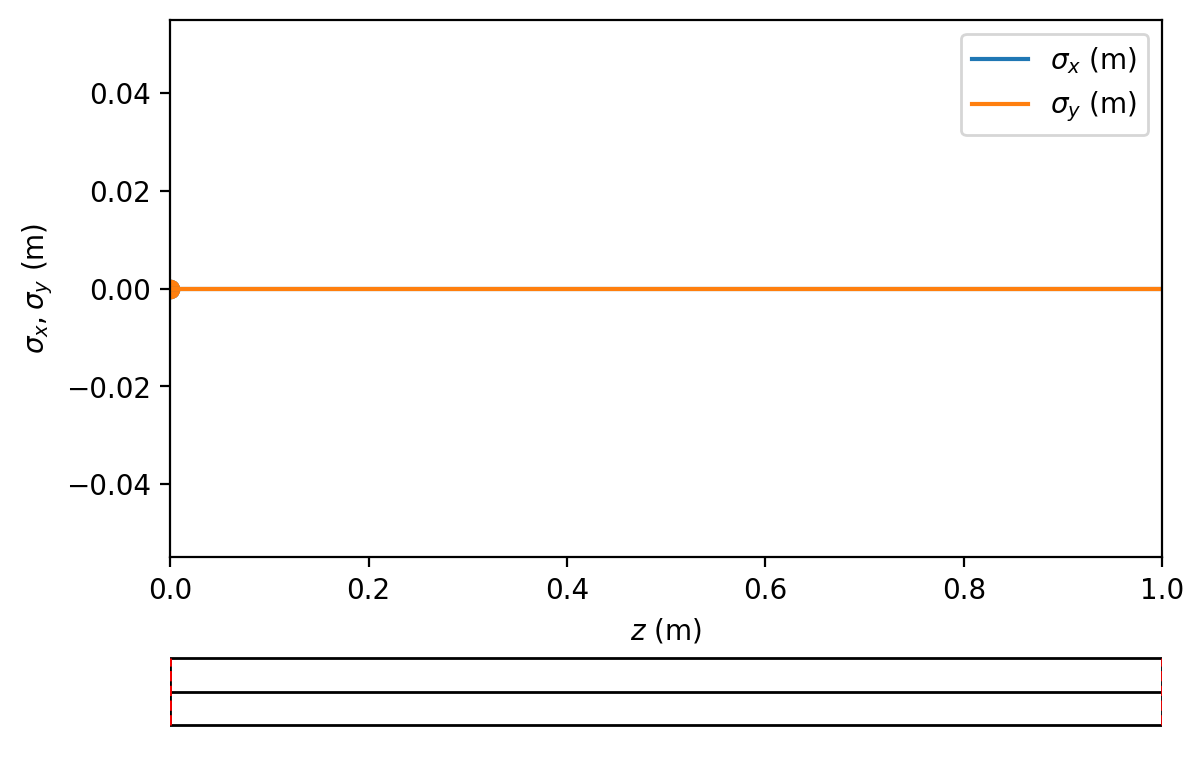

In [8]:
I.plot()

In [9]:
I.output

ImpactZOutput(
    run=RunInfo(
        error=False,
        error_reason='',
        run_script='/Users/klauer/Repos/IMPACT-Z/src/build/ImpactZexe',
        run_time=0.06193850003182888
    ),
    stats=OutputStats(
        beta_ref=array([0.998694, 0.998694, 0.998694, 0.998694, 0.998694, 0.998694,
       0.998694, 0.998694, 0.998694, 0.998694, 0.998694]),
        charge_state_n_particle=array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
        gamma_ref=array([19.5695, 19.5695, 19.5695, 19.5695, 19.5695, 19.5695, 19.5695,
       19.5695, 19.5695, 19.5695, 19.5695]),
        kinetic_energy_ref=array([9489000., 9489000., 9489000., 9489000., 9489000., 9489000.,
       9489000., 9489000., 9489000., 9489000., 9489000.]),
        loadbalance_max_n_particle=array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]),
        loadbalance_min_n_particle=array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]),
        max_amplitude_energy_dev=array([], dtype=float64),
        max_amplitude_gammabeta_x=array([], dtype=float64),
        max_amplitude_gammabeta_y=array([], dtype=float64),
        max_amplitude_phase=array([], dtype=float64),
        max_amplitude_x=array([], dtype=float64),
        max_amplitude_y=array([], dtype=float64),
        max_r=array([0.00000e+00, 3.26185e-18, 1.95882e-17, 4.89792e-17, 9.14346e-17,
       1.46955e-16, 2.15539e-16, 2.97188e-16, 3.91902e-16, 4.99680e-16,
       6.20522e-16]),
        mean_phase_deg=array([ 0.        , -0.00041073, -0.00082145, -0.00123218, -0.0016429 ,
       -0.00205363, -0.00246435, -0.00287508, -0.00328581, -0.00369653,
       -0.00410726]),
        mean_px_over_p0=array([0.00000e+00, 1.30816e-16, 2.61632e-16, 3.92449e-16, 5.23265e-16,
       6.54081e-16, 7.84897e-16, 9.15713e-16, 1.04653e-15, 1.17735e-15,
       1.30816e-15]),
        mean_py_over_p0=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
        mean_x=array([0.00000e+00, 3.26185e-18, 1.95882e-17, 4.89792e-17, 9.14346e-17,
       1.46955e-16, 2.15539e-16, 2.97188e-16, 3.91902e-16, 4.99680e-16,
       6.20522e-16]),
        mean_y=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
        moment3_energy=array([], dtype=float64),
        moment3_phase=array([], dtype=float64),
        moment3_px_over_p0=array([], dtype=float64),
        moment3_py_over_p0=array([], dtype=float64),
        moment3_x=array([], dtype=float64),
        moment3_y=array([], dtype=float64),
        moment4_energy=array([], dtype=float64),
        moment4_phase=array([], dtype=float64),
        moment4_px_over_p0=array([], dtype=float64),
        moment4_py_over_p0=array([], dtype=float64),
        moment4_x=array([], dtype=float64),
        moment4_y=array([], dtype=float64),
        n_particle=array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]),
        norm_emit_x=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
        norm_emit_y=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
        norm_emit_z=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
        phase_ref=array([ 0.    , 20.9859, 20.9859, 20.9859, 20.9859, 20.9859, 20.9859,
       20.9859, 20.9859, 20.9859, 20.9859]),
        sigma_energy=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
        sigma_phase_deg=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
        sigma_px_over_p0=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
        sigma_py_over_p0=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
        sigma_x=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
        sigma_y=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
        twiss_alpha_x=array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]),
        twiss_alpha_y=array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]),
        twiss_alpha_z=array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]),
        z=array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
        max_abs_x=array([0.00000e+00, 3.26185e-18, 1.95882e-17, 4.89792e-17, 9.14346e-17,
       1.46955e-16, 2.15539e-16, 2.97188e-16, 

In [10]:
list(I.output.particles_raw)

['initial_particles', 'final_particles']

In [11]:
Pin = I.output.particles["initial_particles"]
# Our initial particles must be the same as what Impact-Z wrote:
assert initial_particles == Pin

In [12]:
P_raw = I.output.particles_raw["final_particles"]
P = I.output.particles["final_particles"]

In [13]:
P_raw

ImpactZParticles(
    impactz_x=array([1.3005188e-14]),
    impactz_px=array([2.55666481e-14]),
    impactz_y=array([0.]),
    impactz_py=array([0.]),
    impactz_phase=array([-7.16851568e-05]),
    impactz_pz=array([-0.02553329]),
    impactz_charge_to_mass_ratio=array([-1.95695118e-06]),
    impactz_weight=array([-1.]),
    impactz_id=array([1]),
    species='electron',
    filename=PosixPath('tmp/fort.2000')
)

In [14]:
np.min(P_raw.impactz_phase)

np.float64(-7.168515679769366e-05)

In [15]:
np.max(P_raw.impactz_phase)

np.float64(-7.168515679769366e-05)

In [16]:
len(P)

1

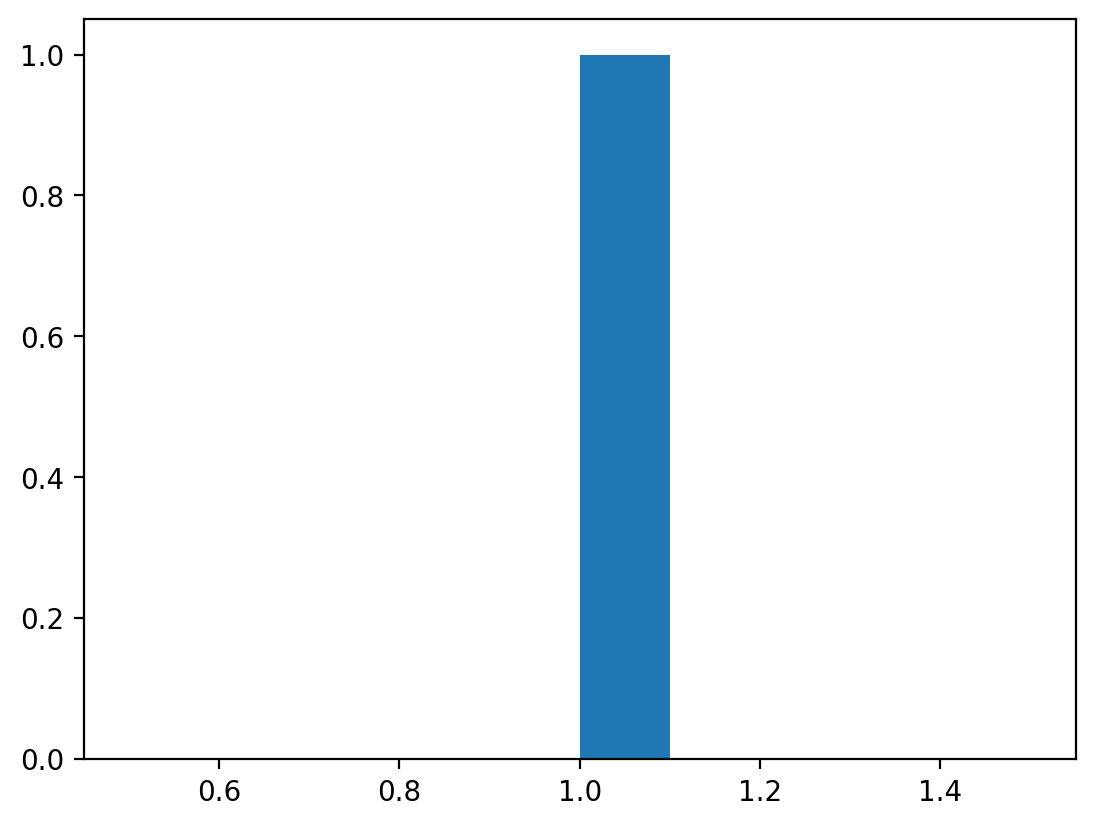

In [17]:
plt.hist(P.weight);

In [18]:
# P.charge = 1.

In [19]:
P.data

{'x': array([6.20522409e-16]),
 'px': array([1.30645303e-08]),
 'y': array([0.]),
 'py': array([0.]),
 'z': array([0.]),
 'pz': array([9999998.94863001]),
 't': array([3.33999831e-09]),
 'status': array([1.]),
 'weight': array([1.]),
 'id': array([1]),
 'species': np.str_('electron')}

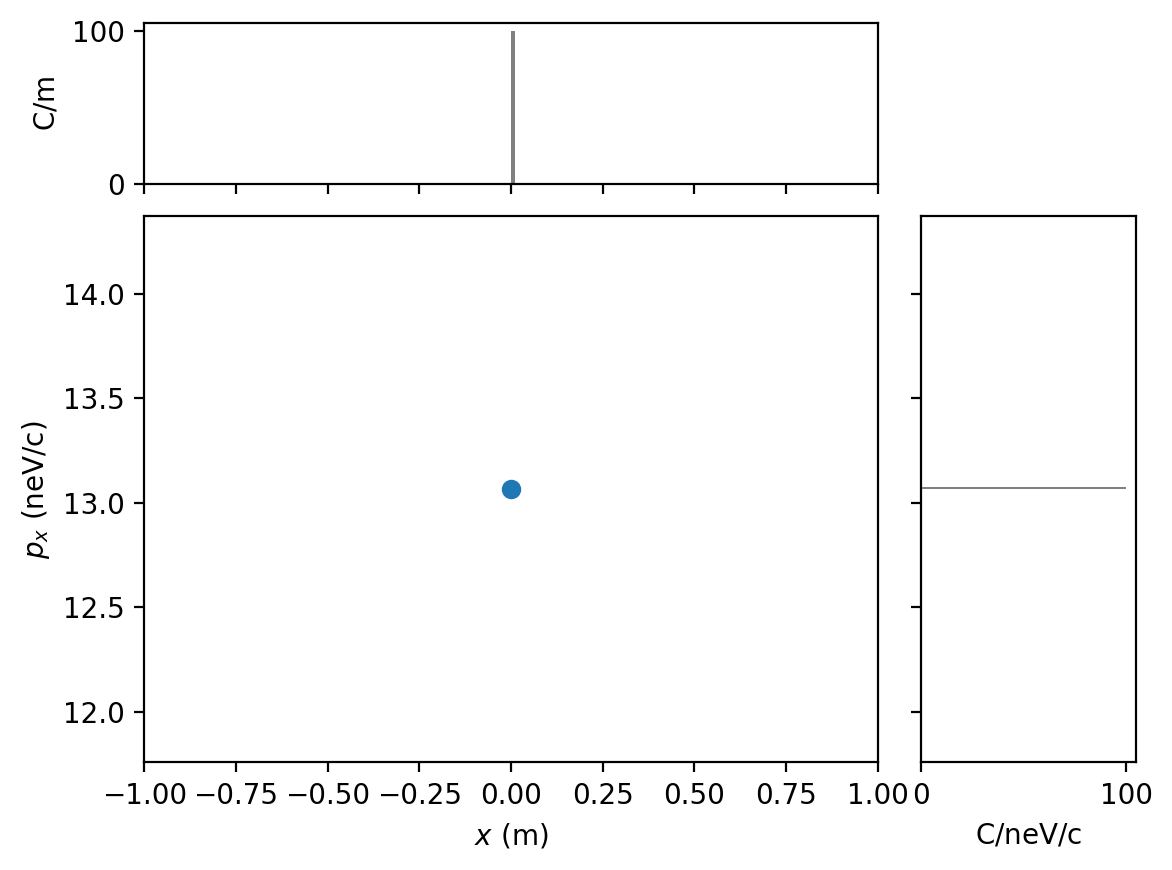

In [20]:
P.plot("x", "px")

In [21]:
P.energy

array([10013046.43450246])

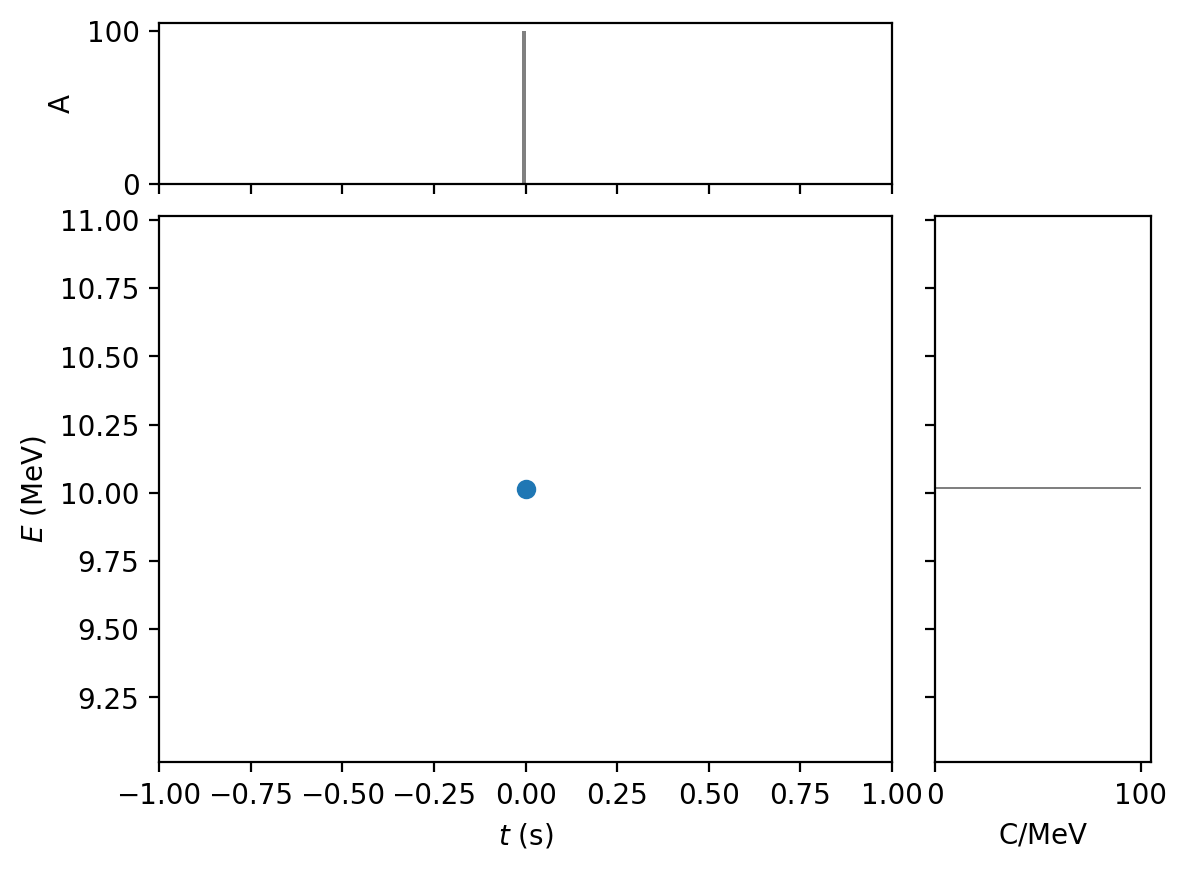

In [22]:
P.plot("t", "energy")

In [23]:
P.drift_to_t()

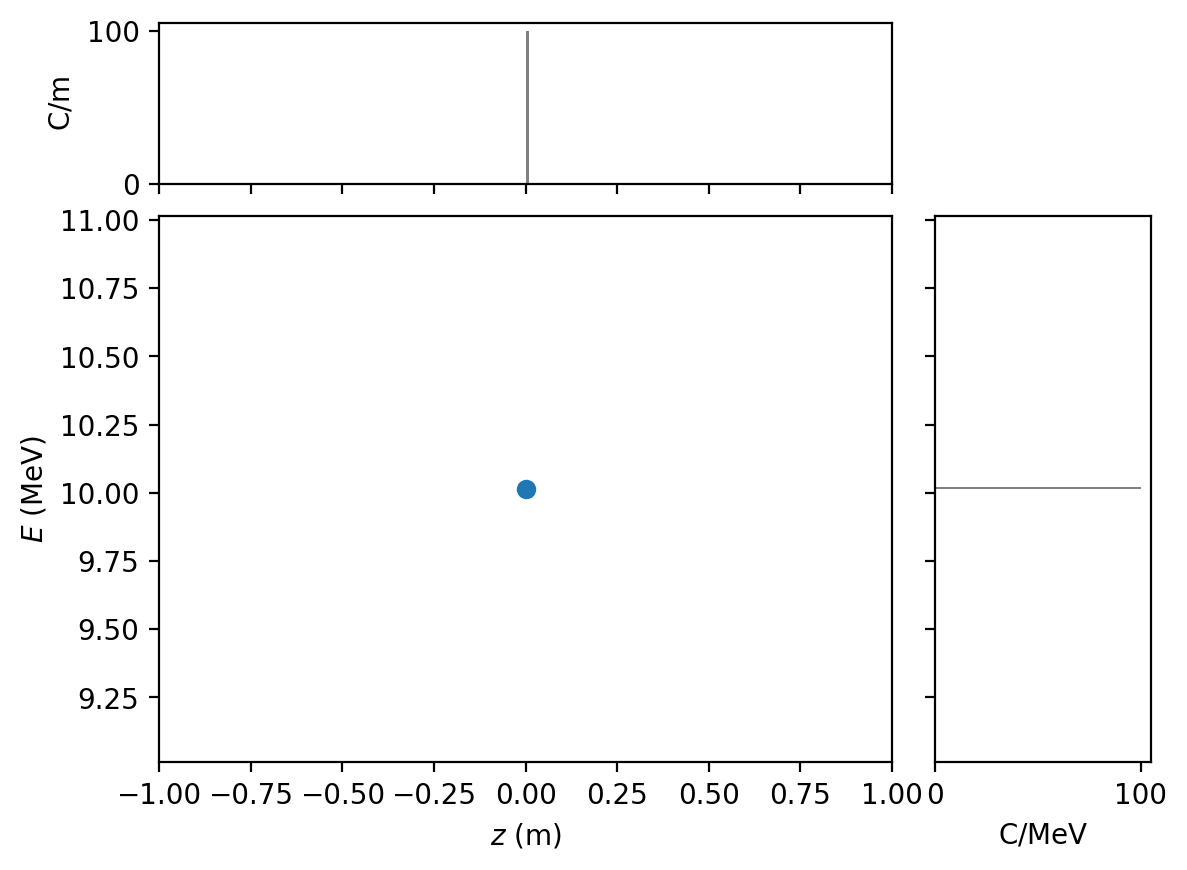

In [24]:
P.plot("z", "energy")

In [25]:
P.charge  # C

np.float64(1.0)

In [26]:
P["sigma_x"], P["sigma_y"], P["sigma_z"]

(np.float64(0.0), np.float64(0.0), np.float64(0.0))